# Решающие деревья
пример(медицинская диагностика)
![desicion](../img/desicion.png)

* в каждой вершине записано условие
* в каждом листе записан прогноз
### условия
* самый популярный вариант: $[x^j\geq t]$
### прогноз в листе
* регрессия
  * вещественное число
* классификация
  * класс
  * вероятности классов
  
не очень глубокое дерево:
![tree1](../img/tree1.png)

увеличиваем глубину дерева:
![tree2](../img/tree2.png)
Видим, что дерево переобучилось(подогналось под выбросы)
## Резюме
* Решающие деревья последовательно проверяют простые условия
* Интерпретируемые
* Позволяют восстанавливать нелинейные зависимости
* Легко переобучаются
## Переобучение деревьев
* дерево может достичь нулевой ошибки на любой выборке
* борьба с переобучением: минимальное дерево из всех с нулевой ошибкой.<br>
К сожалению, это NP- полная задача(нельзя решить за разумное время)

Поэтому воспользуемся более простыми способами:
## Жадное построение
* начинаем с пустого дерева
* каким то образом выбираем корень
* растим дерево от корня к листьям
![greed](../img/greed.png)
### Поиск разбиения
* пусть в вершине $m$ оказалась выборка $X_m$
* $Q(X_m,j,t)$ -критерий ошибки условия $[x^j\leq t]$
* Ищем лучшие параметры $j$ и $t$ перебором(например можно отсортировать значения j признака и брать пороги между ними):$$Q(X_m,j,t)\to \min\limits_{j,t} $$
* после того, как разбиение найдено
* разбиваем $X_m$ на две части:$$X_l=\{x \in X_m|[x^j \leq t|]\}$$$$X_r=\{x \in X_m|[x^j > t|]\}$$
* повторяем процедуру для дочерних вершин(углубляя дерево)
* как понять ,что данную вершину больше разбивать не нужно и ее можно объявить листом?
### Критерий останова
их довольно много
* в вершине один объект?
* в вершине объекты одного класса?
* глубина дерева превысила порог?
### Ответ в листе
* допустим , решили сделать вершину листом
* какой прогноз выбрать?
* регрессия: $a_m=\frac {1}{X_m}\sum_{i \in X_m}y_i$
* классификация: $$a_m=\underset{y \in \mathbb{Y}}{\text{argmax}}\sum_{i \in X_m}[y_i=y]$$
то есть возвращаем класс, которого большего всего (аналогично переходим к вероятностям)
### Критерии информативности
нужны для выбора оптимального разбиения при построении решающего дерева<br>
**Критерий ошибки** <br>
$$Q(X_m,j,t)=\frac{|X_l|}{X_m}H(X_l)+\frac{|X_r|}{X_m}H(X_r)$$
Он состоит из двух слагаемых: разброс ответов в левом листе и разброс ответов в правом листе,где H- некоторая функция,измеряющая на сколько силен разброс  ответов в соответсвующем подмножестве<br>
какой должна быть функция **H(x)**?<br>
* **регрессия**- достаточно измерять дисперсию выборки (**MSE**)$$\bar y=\frac{1}{|X|}\sum_{i \in X}y_i$$
$$H(X)=\frac{1}{|X|}\sum_{i \in X}(y_i-\bar y(X))^2$$
* **классификация**- доля объектов класса $k$ в выборке $X$ $$p_k=\frac{1}{|X|}\sum_{i \in X}[y_i=k]$$
на основе $p_k$ вводятся **критерии информативности**
  * **Критерий Джини** $$H(X)=\sum_{k=1}^k p_k(1-p_k)$$
  **интерпретация** -вероятность ошибки классификатора , который выдает ответы пропорционально $p_k$
  * **Энтропийный критерий** $$H(X)=-\sum_{k=1}^k p_k lnp_k$$
  считаем $0ln0=0$<br>**интерпретация**-мера отличия распределения классов от вырожденного
  
 ### Критерий останова  и стрижка деревьев
 нужен для борьбы с переобучением.
 
 * в вершину попало $\leq n$ объектов
 * при n=1 получаем максимально переобученные деревья
 * n должно быть достаточно ,чтобы построить прогноз
 * рекомендация -n=5
 
еще один критерий:ограничение на глубину

#### Стрижка деревьев
* строим максимально переобученное дерево
* удаляем листья по некоторому критерию
* пример: удаляем, пока улучшается ошибка на валидации
* считается , что работает лучше критериев останова

минусы:
* трудоемкая процедура
* имеет смысл только при использовании одного дерева


# Композиции деревьев
решающие деревья:
* восстанавливают сложные зависимости
* легко переобучаются
* сильно меняются при небольших изменениях обучающей выборки

Бороться с недостатками позволяют **композиции** алгоритмов.<br>
Идея:<br>
* обучим много деревьев $b_1(x),...,b_N(x)$ -базовые алгоритмы
* усредним ответы: $$a(x)=sign \frac{1}/{N}\sum_N^{n=1}b_n(x)$$

нужно делать алгоритмы разными(в одинаковых смысла нет), поэтому строим деревья на случайных подвыборках<br>\
способы рандомизации:
** бутстрап** выбираем из обучающей выборки l объектов с возвращением, примерно 0.632 *l объектов в среднем содержатся в подвыборке,где l-число объектов выборки
* выбор случайного  подмножества объектов, чуть хуже бутсрепа
## Смещение и разброс
ошибка алгоритма на новых данных=Шум+Смещение +Разброс<br>
**Шум**-ошибка лучшей из всех возможных моделей , шум- ошибка данных, ее нельзя улучшить<br>
**Смещение**-отклонение средних ответов нашей модели от ответов лучшей модели<br>
**Разброс**-дисперсия ответов всех моделей<br>

**Линейные модели**<br>
* высокое смещение
* низкий разброс
**Решающие деревья**<br>
* низкое смещение
* большой разброс
**Усреднение алгоритмов**<br>
* не меняет смещение
* разброс=1/N (разброс базового алгоритма)
* если алгоритмы независимы: разброс уменьшается в N раз

К сожалению, алгоритмы обучаются на одной выборке,сложно сделать их полносью независимы<br>
Как исправить:
* Бэггинг: обучаем на случайной подвыборке
* метод случайных подпространств : обучаем на случайном подмножестве подпространств
* объединение обоих методов(появляется гиперпараметр-какую долю признаков мы вибираем)


![bagg](../img/bagg1.png)
## Случайный лес
один из лучших способов объединения деревьев в алгоритмы
* пусть в вершине $m$ оказалась выборка $X_m$
* $Q(X_m,j,t)$ -критерий ошибки условия $[x^j\leq t]$
* Ищем лучшие параметры $j$ и $t$ перебором(например можно отсортировать значения j признака и брать пороги между ними):$$Q(X_m,j,t)\to \min\limits_{j,t} $$
* Случайный лес: выбираем j из случайного подмножества признаков размера q

данный подход позволяет сделать деревья менее коррелированными <br>
рекомендации для q:
* Регрессия: $q=\frac{d}{3}$
* Классификация: $q=\sqrt{d}$

алгоритм построения случайного леса:
* для n= 1,...,N
* Сгенерировать выборку $\tilde{X}$  с помощью бутстрапа
* Построить решающее дерево $b_n(x)$ по выборке $\tilde{X}$
* дерево строится пока в каждом листе не окажется не более $n_{min}$ объектов
* оптимальное разбиение ищется среди q случайных признаков (свое для каждой вершины. в отличии от метода случайных подпространтв)
* объединяем построенные деревья в композицию:
  * регрессия -усредняем
  * классификация -знак от среднего ответа

особенности - 
* **не переобучаются при росте числа базовых алгоритмов**
* каждое дерево строится незавиимо-**идеальное распараллевание**
* каждое дерево обучается на бутстрапированной выборке ~ 63.2% объектов
  * **OUT-OF-BAG**<br>
  строим прогноз для каждого дерева на выборке, на которой не было обучения, то есть кроссвалидация не нужна
  $$OOB=\sum_{i=1}^l L \bigg ( y_i,\frac{1}{\sum_{n=1}^N[x_i \not \in X_n]}\sum_{n=1}^N[x_i \not \in X_n]b_n(x_i) \bigg ),$$
  $b_n(x_i)$ если n-e дерево не обучалось на $b_n(x_i)$
  
* По OOB можно оценивать важность признаков

In [4]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, tree ,model_selection
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ilya.Volchkov\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


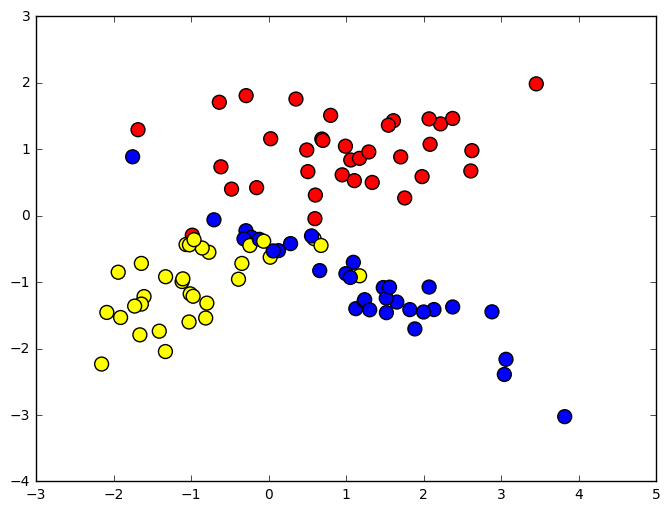

In [2]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100);

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

In [7]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 1, 2, 0])

ValueError: Colormap <function colors at 0x0000000009AFA158> is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

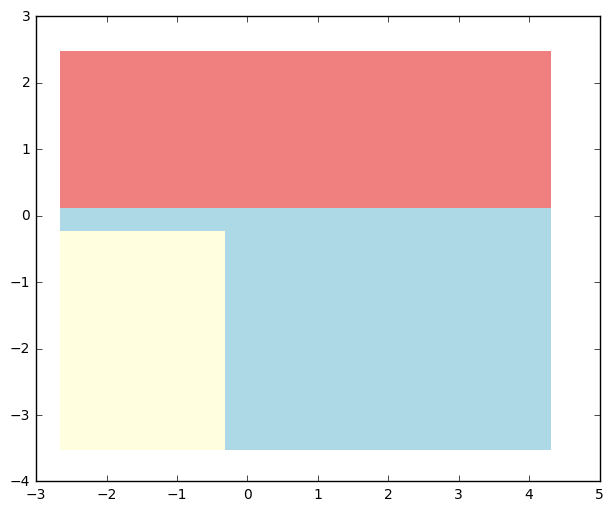

In [8]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))
    
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

# Случайные леса

In [ ]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)